<a href="https://colab.research.google.com/github/eyalgur1/Machine_Learning_Techniques/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import sympy as S
import matplotlib.pyplot as plt
import cvxpy as cvx
from IPython.display import Latex
import sklearn as skl
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


#### LATEX Macros:

In [61]:
from IPython.display import display, Javascript

# JavaScript code to define LaTeX macros
js_code = """
window.MathJax = {
  TeX: {
    Macros: {
      \newcommand{\vect}[1]{{\mathbf{\boldsymbol{{#1}}}}},
      \newcommand{\norm}[1]{\left\Vert {#1} \right\Vert},
      \newcommand{\abs}[1]{\left| {#1} \right|},
      \newcommand{\sm}[1]{{\left\{ {#1}\right\}}},
      \newcommand{\sa}[1]{\left( {#1} \right)},
      \newcommand{\sr}[1]{\left[ {#1} \right]},
      \newcommand{\real}{\mathbb{R}},
      \newcommand{\AAA}{\mathcal{A}},
      \newcommand{\BBB}{\mathcal{B}},
      \newcommand{\CCC}{\mathcal{C}},
      \newcommand{\DDD}{\mathcal{D}},
      \newcommand{\EEE}{\mathcal{E}},
      \newcommand{\FFF}{\mathcal{F}},
      \newcommand{\GGG}{\mathcal{G}},
      \newcommand{\HHH}{\mathcal{H}},
      \newcommand{\III}{\mathcal{I}},
      \newcommand{\JJJ}{\mathcal{J}},
      \newcommand{\KKK}{\mathcal{K}},
      \newcommand{\LLL}{\mathcal{L}},
      \newcommand{\MMM}{\mathcal{M}},
      \newcommand{\OOO}{\mathcal{O}},
      \newcommand{\PPP}{\mathcal{P}},
      \newcommand{\QQQ}{\mathcal{Q}},
      \newcommand{\RRR}{\mathcal{R}},
      \newcommand{\SSS}{\mathcal{S}},
      \newcommand{\TTT}{\mathcal{T}},
      \newcommand{\VVV}{\mathcal{V}},
      \newcommand{\WWW}{\mathcal{W}},
      \newcommand{\XXX}{\mathcal{X}},
      \newcommand{\YYY}{\mathcal{Y}},
      \newcommand{\ZZZ}{\mathcal{Z}},
      \newcommand{\baa}{{\bf A}},
      \newcommand{\bbb}{{\bf B}},
      \newcommand{\bcc}{{\bf C}},
      \newcommand{\bdd}{{\bf D}},
      \newcommand{\bee}{{\bf E}},
      \newcommand{\bff}{{\bf F}},
      \newcommand{\bgg}{{\bf G}},
      \newcommand{\bhh}{{\bf H}},
      \newcommand{\bii}{{\bf I}},
      \newcommand{\bjj}{{\bf J}},
      \newcommand{\bkk}{{\bf K}},
      \newcommand{\bll}{{\bf L}},
      \newcommand{\bmm}{{\bf M}},
      \newcommand{\bnn}{{\bf N}},
      \newcommand{\boo}{{\bf O}},
      \newcommand{\bpp}{{\bf P}},
      \newcommand{\bqq}{{\bf Q}},
      \newcommand{\brr}{{\bf R}},
      \newcommand{\bss}{{\bf S}},
      \newcommand{\btt}{{\bf T}},
      \newcommand{\buu}{{\bf U}},
      \newcommand{\bvv}{{\bf V}},
      \newcommand{\bww}{{\bf W}},
      \newcommand{\bxx}{{\bf X}},
      \newcommand{\byy}{{\bf Y}},
      \newcommand{\bzz}{{\bf Z}},
      \newcommand{\ba}{{\bf a}},
      \newcommand{\bb}{{\bf b}},
      \newcommand{\bc}{{\bf c}},
      \newcommand{\bd}{{\bf d}},
      \newcommand{\be}{{\bf e}},
      \newcommand{\bg}{{\bf g}},
      \newcommand{\bh}{{\bf h}},
      \newcommand{\bi}{{\bf i}},
      \newcommand{\bj}{{\bf j}},
      \newcommand{\bk}{{\bf k}},
      \newcommand{\bl}{{\bf l}},
      \newcommand{\bm}{{\bf m}},
      \newcommand{\bn}{{\bf n}},
      \newcommand{\bo}{{\bf o}},
      \newcommand{\bp}{{\bf p}},
      \newcommand{\bq}{{\bf q}},
      \newcommand{\br}{{\bf r}},
      \newcommand{\bs}{{\bf s}},
      \newcommand{\bt}{{\bf t}},
      \newcommand{\bu}{{\bf u}},
      \newcommand{\bv}{{\bf v}},
      \newcommand{\bw}{{\bf w}},
      \newcommand{\bx}{{\bf x}},
      \newcommand{\by}{{\bf y}},
      \newcommand{\bz}{{\bf z}},
      \newcommand{\Ebb}{{\mathbb E}},
      \newcommand{\bmu}{\boldsymbol{\mu}},
      \newcommand{\bbeta}{\boldsymbol{\beta}},
      \newcommand{\beps}{\boldsymbol{\epsilon}},
      \newcommand{\bzeta}{\boldsymbol{\zeta}},
      \newcommand{\bomega}{\boldsymbol{\omega}},
      \newcommand{\bSigma}{\boldsymbol{\Sigma}},
      \newcommand{\btheta}{\boldsymbol{\theta}},
      \newcommand{\lamax}{\lambda_{\max}},
      \newcommand{\lamin}{\lambda_{\min}}
    }
  }
};
"""

# Inject JavaScript into the notebook
display(Javascript(js_code))

<IPython.core.display.Javascript object>

# **Chapter 4: Machine Learning**

## **4.2 Python Machine Learning Modules**
We use scikit-learn to create regressions.

### **Linear Regression**

[[0.86601502]] [0.46245419]
0.9112552163954293


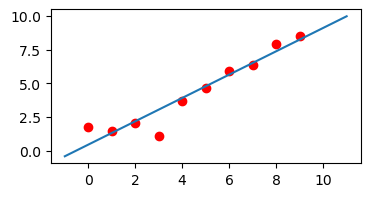

In [ ]:
from matplotlib.pylab import subplots
np.random.seed(3)

X = np.arange(10)  # the range from 0 to 10
Y = X + np.random.randn(10)

lr = linear_model.LinearRegression()  # create an empty linear regression
X,Y = X.reshape((-1,1)), Y.reshape((-1,1))  # inputs a tuple that rehapes X,Y with 1 column and the amount of required rows needed to satisfy this (indicated by -1)
lr.fit(X,Y)  # finds the leaset squres (norm_2) linear regression of mean of X vs. mean of Y
print(lr.coef_, lr.intercept_)  # displayes the coefficients of the regression
print(lr.score(X,Y))  # R^2 score

# now given some new data points, we predice new values
xi = np.linspace(0,10,150)  # 150 equally spcaed points between 0 and 100
lr.predict(xi.reshape((-1,1)))

f = plt.figure(figsize=(4,2))
plt.plot(np.linspace(-1,11,100), np.linspace(-1,11,100)*lr.coef_[0][0]+lr.intercept_[0])  # r.coef_[0][0] is the coefficient and lr.intercept_[0] is the free coefficient
plt.scatter(X, Y, color='red')
plt.show()

# IMPORTANT NOTE: WE SEE THAT THE OFFSET CONSTANT IS ALREADY BULIT IN SO WE GET ONLY ONE COEFF AND NOT TWO, AND WE DO NOT NEED TO WORRY ABOUT IT. THIS CAN IMMEDIATELY BE CHANGED BY THE ARGUMENTS OF FIT

### **Multilinear Regression**

[[2.18213207 3.0525202 ]] [-16.6202682]
0.42202226467890747


C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


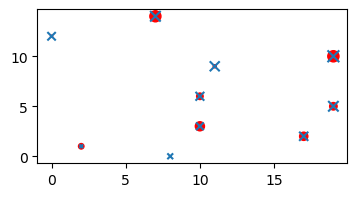

In [ ]:
np.random.seed(3)
X = np.random.randint(20, size=(10,2)) # each row is a 2D data point
Y = np.transpose(X@np.array([[1],[3]]))+1+np.random.randn(X.shape[0])*20 # the lables of the points
Y = Y.reshape((10,-1))
lr = skl.linear_model.LinearRegression()
lr.fit(X,Y)
print(lr.coef_, lr.intercept_)
print(lr.score(X,Y))

f = plt.figure(figsize=(4,2))
plt.scatter(X[:,0], X[:,1], Y, color='red')  # plot training
plt.scatter(X[:,0], X[:,1], X[:,0]*lr.coef_[0][0] + X[:,1]*lr.coef_[0][1], marker='x')  # plot the training X but with the predicted Y
plt.show()
# we can see that the size of the markers is roughly the size of the circels, meaning that generally we have a good fit. We can also see that two markers are not the same size, indicated a poor fit for these teo points

### **Polynomial Regression**

[[     0.         -10180.88011447    205.48774617]]


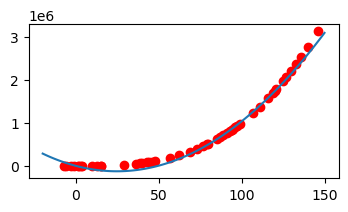

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.random.randint(-20, 150, size=(50,1))
Y = X + X**2 + X**3 + np.random.randn(*X.shape)*80 + 20 # notice that *X.shape unpacks X.shape, instead of using randn(X.shape[0], X.shape[1])
plt.figure(figsize=(4,2))
plt.scatter(X,Y,color='red')

poly = PolynomialFeatures(2).fit_transform(X)  # 2nd degree poly fit (the data is a 3rd degree poly only for the sake of data production)
# print(poly)  # printing 'poly' we see that 'fit_transform' adds a column of ones (as we eould expect), instead of performing it manually
# 'PolynomialFeatures.fit_transform' generates a matrix with 3 columns: each with X**i where 'i' is the ind of the column (the data points as a 2nd order polynomial)
# This means that 'PolynomialFeatures.fit_transform' automatically adds the free coefficient columns, and there is no need to add it manually

pol_reg = skl.linear_model.LinearRegression()
pol_reg.fit(poly, Y)
# When the input matrix to LinearRegression's 'fit' has 3 columns, and if 'fit' is set to the default state of 'intercept=True',
# then it generates a 2nd order poly fit

xi = np.linspace(-20,150,100)
print(pol_reg.coef_)

plt.plot(xi, pol_reg.coef_[0][0]+ pol_reg.coef_[0][1]*xi + pol_reg.coef_[0][2]*xi**2)
plt.show()

## **4.3 Theory of Learning**

### **4.3.1 Introduction to Theory of Machine Learning**
In machine learning, we aim at finding the best approximating function $f$ by using only the training set. For examle, consider the training set $\XXX$ of all three-bit sequences (that is, sequences of $0,1$ of length three).

In [ ]:
import pandas as pd

seq = ['{0:03b}'.format(i) for i in range(2**3)]  # cetaes 3-digit binary strings (there are some less efficient ways)
df = pd.DataFrame(index=pd.Index(seq, name='x'))  # here w specify exactly what are the inducex, otheriwse it will just be the set 1:2**3
df['f'] = [(i.count('0')>i.count('1'))*1 for i in seq]  # the function f yields 1 if the number of 0s is greater than he number of 1s
df

,f
x,
000,1
001,1
010,1
011,0
100,1
101,0
110,0
111,0


How many possible $f:\XXX\to\sm{0,1}$ exist? There are $2^{\left|\XXX\right|}=2^8$ possibilities. If we are given s training set of just $4$ sequences out of the possible $8$, then there are $2^4$ possible $f$-s that match the training set. How to choose the best one? If the test set has many values that are also in the training set - then the approximated $f$ wil give better results. Hence, if the training set is large - then we will get better results.

### **4.3.2 Theory of Generalization**

*Generalization* in ML means that whatever the performance on the training set, it should be pretty close to the corresponding performance once deployed (no surprises on thetest set). Mathematically,
$$\mathbb{P}\sa{\abs{E_{\mathrm{out}}\sa{\hat f}-E_{\mathrm{in}}\sa{\hat f}>}\epsilon}<\delta.$$
Two ways to achieve this: cross-validation and probability inequalities. One fundamental inequality is VC dimension inequality, which states that the expected out-of-sample error can be no worse than the in-sample error plus a penalty due to the complexity
of the hypothesis set.

### **4.3.3 Worked Example for Generalization/Approximation Complexity**

Consider the training set $\sa{x_i,y_i}$. The method groups the $x$-data into intervals and then averages the $y$-data in those intervals. Prediction is for a new $x$ is reporting the corresponding nearest average value. That is, a simple nearest neighbor classifier.

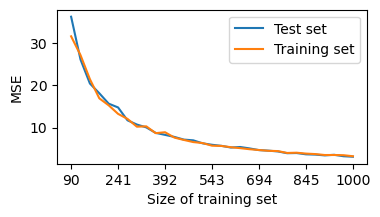

In [ ]:
np.random.seed(1)
N = np.arange(90,1000,30)  # size of training set
N_test = 500  # size of test set
MSE_vals_test = []
MSE_vals_train = []

# this is the test set
test = pd.DataFrame(columns=['x','y_predict'])
y_predict = np.empty((N_test))
test['x'] = np.sort(np.random.choice(range(2**10),size=N_test))


for n in N:
    train = pd.DataFrame(columns=['x','y'])
    train['x'] = np.sort(np.random.choice(range(2**10),size=n))  # chooses n random numbers from the set range(2**10) (with repetitions)
    # we now group the random sorted integers into groups of 10 in each (9 groups)
    means = np.mean(train.x.values.reshape((-1,10)),1)  # train.x.values returns a numpy array of the values in column x, then we take the mean over the columns (each row)
    y = np.kron(means, np.ones((10)))  # assign the ten means
    train['y'] = y
    train['square_error'] = (train['x'] - train['y'])**2
    MSE_vals_train.append(np.sqrt(np.mean(train['square_error'])))

    # find the nearest mean and write it into y_test
    for i in test.x.items():
        min_ind = np.argmin(np.abs(i[1] - means))
        y_predict[i[0]] = means[min_ind]
    test['y_predict'] = y_predict
    test['square_error'] = (test['x'] - test['y_predict'])**2
    MSE_vals_test.append(np.sqrt(np.mean(test['square_error'])))

plt.figure(figsize=(4,2))
plt.plot(MSE_vals_test)
plt.plot(MSE_vals_train)
plt.legend(['Test set','Training set'])
plt.ylabel('MSE')
plt.xlabel('Size of training set')
plt.xticks(ticks=range(0,31,5), labels =['90','241','392','543','694','845','1000'])
plt.show()

# We can see in the plot that test MSE loss is greater than the training only for the smallest n. As the size of thetraining set increases, it holds a lot of examples from the test set and the two MSEs are similar

### **4.3.4 Cross-Validation**

In the code above we had good results since we could just generate more synthetic training/test data. This is not possible if we have fixed data. In this case we use cross-validation, where the training set is used for test.

A popular approach for cross-validation is $k$-folds. Here, the original data is randomly partitioned into $k$ equal sized subsets, often referred to as "folds". Of the $k$ subsets, a single subset is used as the validation data for testing the model, and the remaining $k − 1$ subsets are used for training. The cross-validation process is then repeated $k$ times, with each of the $k$ subsets used exactly once as the test data. The $k$ results can then be averaged to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

In [ ]:
# 3-fold using scikit-learn
data = np.array(['a',]*2+['b',]*8+['c',]*6); print(data)
kf = skl.model_selection.KFold(3); print(kf)

for train_idx,test_idx in kf.split(data):
    print (train_idx,test_idx)
    # the for loop displays the indices of the elements in each fold.
    # The set on the left are the joint two training sets, and on the right are the test sets. Of course that the training and test sets are disjoint

# we can also display the data
for train_idx,test_idx in kf.split(data):
    print('training', data[train_idx])
    print('testing' , data[test_idx])

['a' 'a' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c' 'c' 'c']
KFold(n_splits=3, random_state=None, shuffle=False)
[ 6  7  8  9 10 11 12 13 14 15] [0 1 2 3 4 5]
[ 0  1  2  3  4  5 11 12 13 14 15] [ 6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14 15]
training ['b' 'b' 'b' 'b' 'c' 'c' 'c' 'c' 'c' 'c']
testing ['a' 'a' 'b' 'b' 'b' 'b']
training ['a' 'a' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c' 'c']
testing ['b' 'b' 'b' 'b' 'c']
training ['a' 'a' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'c']
testing ['c' 'c' 'c' 'c' 'c']


Assume we want to find a linear fit for the sine function. We use $4$-fold as an example.

MSE on test for fold #1 is: 0.12925276419010573
MSE on test for fold #2 is: 0.12047795492987307
MSE on test for fold #3 is: 0.15355643389765258
MSE on test for fold #4 is: 0.13971291590311483


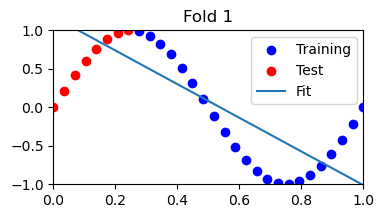

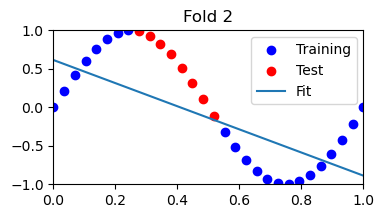

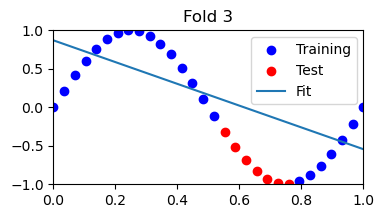

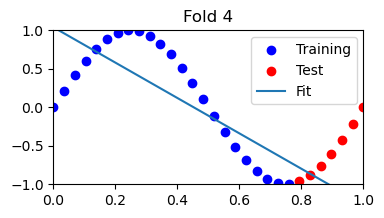

In [ ]:
xi = np.linspace(0,1,30)
yi = np.sin(2*np.pi*xi)  # y values (training/test set)
data = np.concatenate((xi.reshape(-1,1), yi.reshape(-1,1)),1)  # a matrix with rows as data points
four_fold = skl.model_selection.KFold(4)  # ceate a 4-fold sets

ind_train_set = 0
for train_idx, test_idx in four_fold.split(data):  # for each of the data points corresponding to sets
    ind_train_set += 1
    plt.figure(ind_train_set, figsize=(4, 2))  # create four figures, one for each of the folds
    plt.scatter(data[train_idx][:,0],data[train_idx][:,1], color='blue')  # scatter all training points in this set
    plt.scatter(data[test_idx][:,0],data[test_idx][:,1],color='red')  # scatter just the test points

    # LINEAR REGRESSION FOR EACH OF THE TRAINING SETS AND CALCULATE THE MSE FOR EACH CORRESPONDING TEST SET
    lf = skl.linear_model.LinearRegression()
    lf.fit(data[train_idx][:,0].reshape(-1,1), data[train_idx][:,1].reshape(-1,1))
    plt.plot(np.linspace(0,1,2), np.linspace(0,1,2)*lf.coef_[0][0]+lf.intercept_[0])
    plt.ylim(-1,1), plt.xlim(0,1), plt.legend(['Training', 'Test','Fit']), plt.title('Fold '+str(ind_train_set))

    print('MSE on test for fold #'+str(ind_train_set)+' is:', (1/train_idx.shape[0])*np.sum((data[test_idx][:,1] - data[test_idx][:,0]*lf.coef_[0][0] - lf.intercept_[0])**2))

# since fold #2 has the lowest MSE on the test set, then we pick its linear predictor as our predictor (we can also take avg of all predictors)

## **4.4 Decision Trees**

A type of a simple classifier. We use scikit-learn to understand this concept through an example.

In each step, the data $\DDD$ is split into branches $\DDD_1$ and $\DDD_2$. How to split the data? A common way is the *Gini impurity index*:
$$\text{Gini impurity}\sa{\DDD}\equiv\frac{n_1}{n}\text{Gini}\sa{\DDD_1}+\frac{n_2}{n}\text{Gini}\sa{\DDD_2},$$
where $n_1+n_2=n$ is the size of the corresponding datasets, and where
$$\text{Gini}\sa{\DDD_j}\equiv1-\sum_{j=1}^cp_j^2,$$
where $p_j$ is the probability of samples belonging to class $j$ and $c$ is the number of classes.

The lower the Gini Impurity, the higher is the homogeneity of the node. The Gini Impurity of a pure node is zero. To split a decision tree using Gini Impurity, the following steps need to be performed.
1. For each possible split, calculate the Gini Impurity of each child node:
    1. If the data is categorical ('yes' and 'no'): calculate the Gini Impurity of each split as the weighted average Gini Impurity of child nodes
    2. If the data is numeircal:
        1. Sort the data frame by the numerical variable
        2. Calculate the mean of neighbouring values
        3. Calculate the Gini Impurity for all splits for each of these means
3. Select the split with the lowest value of Gini Impurity
4. Repeat the above until no further split is possible

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()  # create a decision tree
M = np.fromfunction(lambda i,j: j>=2, (4,4))  # creates numpy array from lambda functions. Here it generates a (4,5) matrix with 0,1
print(M)

i,j = np.where(M==0) # returns a tuple of indices (i,j) for where M==0. Both i and j are row vectors with the corresponding indices
x = np.vstack([i,j]).T  # stacks the two rows vertically (one above the other). It takes only one positional argument
y = j.reshape(-1,1)*0  # the values (all zeros of course)

i,j = np.where(M==1)
x = np.vstack([x, np.vstack([i,j]).T])
y = np.vstack([y, j.reshape(-1,1)*0+1])


# now we have x data and y lables in matrix form, so we classify (fit) using the tree
clf.fit(x,y)
# the points x_i in the training set are each of size 2. Meaning, we have 2 features, in this case they are numerical with index entries of a matrix
# possible values of the first and second elemnts of x_i are: 0,1,2,3. The means are 0.5, 1.5, 2.5.
# the tree then therefore has 6 possible questions: is x[0]<=0.5,1.5,2.5? is x[1]<=0.5,1.5,2.5?
# the Gini Impurity is calculated for each of these six questions.
# It turns out that the question 'is x[1]<=1.5?' has the lowest Gini Impurity, so now we branch the data according to this question.
# the process continues until we have 0 gini in all leaves (full impurity of the data and there are no more possible questions)

[[False False  True  True]
 [False False  True  True]
 [False False  True  True]
 [False False  True  True]]


DecisionTreeClassifier()

The accuracy of a decision tree is the number of correct predictions made divided by the total number of predictions made.

In [ ]:
# we calculatethe accuracy of the tree as follows
clf.score(x,y)

1.0

Here we get an accuracy of $1$ in this simple task, which is an indication of bad generalization and overfitting. This is common in decision tree. In conclusion:

Pros:
1. Decision trees are intuitive, easy to understand and interpret.
2. Decision trees are not effected by outliers and missing values.
3. The data doesn’t need to be scaled.
4. Numerical and categorical data can be combined.
5. Decision trees are non-parametric algorithms.

Cons:
1. Overfitting is a common problem. Pruning (clipping lower leafs) may help to overcome this. There are some pruning algorithms.
2. Although decision trees can be used for regression problems, they cannot really predict continuous variables as the predictions must be separated in categories.
3. Training a decision tree is relatively expensive and can increase exponentially.

We should also mention that by examining the example above, it is clear that a different tree is made for a different data matrices, and it is clear that by rotating a matrix we get a different tree (as the partitioning into subsets of data may change). Can this transformed data yield a "simpler" tree with fewer calculations for the exact training set? This is a difficult problem. Thus, the advantages of decision trees can be easily outmatched by other methods that do have the ability to uncover useful transformations, but will necessarily be harder to train. Another disadvantage is that because
of how decision trees are built, even a single misplaced data point can cause the tree to grow very differently. This is a symptom of high variance.

### **4.4.1 Random Forests**
Given a training set $X$ with responses $Y$, we repeatedly select a random sample with replacement of the training set and fit trees to these samples:

For $b=1,2,\ldots,B$:
1. Sample with replacement (i.e., the data can ovelap between trees) $n$ training examples from $X$, $Y$; call these $X_b$, $Y_b$.
2. Train a classification or regression tree $f_b$ on $X_b$, $Y_b$.

After training, predictions for unseen samples $x'$ can be made by averaging the predictions from all the individual regression trees on $x'$: $\hat f=\frac{1}{B}\sum_{b=1}^Bf_b\sa{x'}$, or by taking the plurality vote in the case of classification trees.

This procedure ("bootstrap") leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are *not correlated*. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); this procedure is a way of de-correlating the trees by showing them different training sets.

In [ ]:
# we use sklearn for a random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=4, max_depth=2)
# we use only four trees, each of depth 2. This small depth helps generalization

# now we can train the forest using: rfc.fit(X, Y)

Even though all the decision trees share the same training data, the random forest algorithm randomly picks feature subsets (with replacement) upon which to train individual trees. This helps avoid the tendency of decision trees
to become too deep which hurts both performance and generalization. At the prediction step, the individual outputs of each tree are put to a majority vote for the final classification.

To estimate generalization errors without using cross-validation, the training elements that are *not* used for a particular  tree can be used to test that tree and form a collaborative estimate of generalization errors. This is called the out-of-bag estimate.

The main advantage of random forest classifiers is that they require very little tuning and provide a way to trade-off bias and variance via averaging and randomization. Furthermore, they are fast and easy to train in parallel and fast to predict. On the downside, they are less interpretable than simple decision trees.

## **4.5 Boosting**

Recall that using ortogonalization we sequentially create a set of independent vectors, and by that strip any new incoming vectors from preexisting components already present in the set.

Here, we use this concept to find a classifier $\hat f$ that is a weighted sum of $M$ basis functions $h_m\sa{x}$ called weak learners: $\hat f\sa{x}=\sum_{m=1}^M\gamma_mh_m\sa{x}$. For example, the basis functions can be decision trees.

How to derive these basis functions? We minimize the expectation of some loss function $L\sa{y,f\sa{x}}$. The genreal algorithm now reads:
1. Initialize $f_0\sa{x}=\underset{{\gamma}}{\text{argmin}}\sum_{i=1}^nL\sa{y_i,\gamma}$ (or any other constant), and $\HHH$ a space of classifiers.
2. For $m=1,2,\ldots,M$:
    1. Compute $\sa{\gamma_m,h_m}=\underset{\gamma,h\in\HHH}{\text{argmin}}{\sum_{i=1}^nL\sa{y_i,f_{m-1}\sa{x_i}+\gamma h\sa{x_i}}}$.
    2. Update $f_m\sa{x}=f_{m-1}\sa{x}+\gamma_mh_m\sa{x}$.
    
**AdaBoost:** Here we take the exponential loss $L\sa{y,f\sa{x}}=\exp\sa{-yf\sa{x}}$ and $\HHH$ is the class of classifiers of the form $h_m\colon X\to\sm{-1,1}$ (it can be a tree). It can be shown that $h_m=\text{argmin}_{h\in\HHH}\sum_{i=1}^n\exp\sa{y_if_{m-1}\sa{x_i}}\cdot I\sa{y_i\ne G\sa{x_i}}$ and that $\gamma_m=\frac{1}{2}\log\frac{1-\epsilon_m}{\epsilon_m}$ where $\epsilon_m=\frac{\sum_{i=1}^nh_m\sa{x_i}}{\sum_{i=1}^n\exp\sa{y_if_{m-1}\sa{x_i}}}$.

**Gradient Boosting:** The optimization problem in step 2A can be hard. To this end we look at a variant of boosting called Gradient Boosting that uses (functional) gradient descent. For a differentiable loss function $L\sa{y,f\sa{x}}$ and where $\HHH$ is the set of all differentiable functions over $\real$, the derivations give the folloiwng algorithm:

1. Initialize $f_0\sa{x}=\mathrm{argmin}_{\gamma}\sum_{i=1}^nL\sa{y_i,\gamma}$ (or any other constant).
2. For $m=1,2,\ldots,M$:
    1. Compute the pseudo-residuals: $r_{im}=-\sr{\frac{\partial L\sa{y_i,f\sa{x_i}}}{\partial f\sa{x_i}}}_{f\sa{x}=f^{m-1}\sa{x}}$ for $i=1,2,\ldots,n$.
    2. Fit a base learner $h_m\sa{x}$ (e.g., tree) on the training set $\sm{\sa{x_i,r_{im}}}_{i=1}^n$ ("descent direction")
    3. Compute $\gamma_m=\underset{\gamma}{\mathrm{argmin}}\sum_{i=1}^nL\sa{y_i,f_{m-1}\sa{x_i}+\gamma h_m\sa{x_i}}$ ("exact line serach").
    2. Update $f_m\sa{x}=f_{m-1}\sa{x}+\gamma_mh_m\sa{x}$.

### **XGBoost**

eXtreme Gradient Boosting) is an open-source software library which provides a regularizing gradient boosting framework, and it implements the grdaient boosting algorithm described above.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import random

In [39]:
"Set the Dataset"


# Load dataset (for example purposes, we'll use 'melbourne_housing.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Machine_and_Deep_Learning/ML/melbourne_housing.csv')


# Print all column names so that we can choose which ones to drop (here we drop non-numerical data)
column_names = data.columns
print('The available columns (features) are:\n', column_names, '\n\n')


# Clean the data
data = data.drop(['Suburb', 'Address', 'Type','Method','SellerG','Date','CouncilArea','Regionname'], axis=1)  # delete these columns
data = data.dropna(how='any')  # drop any row that has at least one NaN (now that data is cleaned)
print('The complete cleaned dataset is:\n', data)


# Assume the target variable is 'Price' and the rest are features
X = np.array(data.drop('Price', axis=1))
y = np.array(data['Price']).reshape(-1,1)  # set the prices as the labels


# Split the data into training (pre-scaling) and remaining data
X_train_pre, X_remain, y_train_pre, y_remain = train_test_split(X, y, test_size=0.2, random_state=1)  # split and fix the seed
# Split remaining data into validation and test sets
X_val_pre, X_test_pre, y_val_pre, y_test_pre = train_test_split(X_remain, y_remain, test_size=0.5, random_state=1)


# Initialize scaler to normalize the data to have the same scale
scaler_X = skl.preprocessing.MinMaxScaler()  # initializes a scaler that scales any column to [0,1] (column-wise)
scaler_y = skl.preprocessing.MinMaxScaler()  # another scaler for the y data


# Scale the data according to the training set
X_train = scaler_X.fit_transform(X_train_pre)  # fits the training data to [0,1] according to its min and max values
X_val = scaler_X.transform(X_val_pre)  # tranforms that data according to the limits already set by the training set
X_test = scaler_X.transform(X_test_pre)
y_train = scaler_y.fit_transform(y_train_pre)
y_val = scaler_y.transform(y_val_pre)
y_test = scaler_y.transform(y_test_pre)


# Initialize the XGBoost regressor
n_estimators = 100
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=0.1, max_depth=5, eval_metric=['mae','rmse'])
# max_depth: each decision tree in the ensemble can have a max_depth levels (overfitting-accuracy tradeoff)
# n_estimators: number of tress (variance-runtime tradeoff)
# eval_metric: specifying the type of metrics to keep track of

The available columns (features) are:
 Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object') 


The complete cleaned dataset is:
        Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
2          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
4          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
6          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
11         3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
14         2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
34847      3   500000.0      25.5    3750.0       3.0       2.0  2.0   
34849      3   570000.0      25.5    3750.0       3.

In [43]:
"Training and Evaluation"


num_epochs = 4
results = {'train_mae':np.array([]), 'train_rmse':np.array([]), 'valid_mae':np.array([]), 'valid_rmse':np.array([])}

for epoch in range(num_epochs):

  # Shuffle the training data at each epoch (here, every epoch is single-batched)
  shuffled_indx = np.random.permutation(X_train.shape[0])  # permutes the array [0,1,...,X_train.shape[0]] (row indices)
  X_train_shuffle = X_train[shuffled_indx]
  y_train_shuffle = y_train[shuffled_indx]
  eval_set=[(X_train_shuffle, y_train_shuffle), (X_val, y_val)]

  # Train the model
  print('\n\n','Epoch ',str(epoch+1),'/',str(num_epochs)+'. validation_0=Training, validation_1=Validation')
  if epoch == 0:  # first epoch
    xgb_model.fit(X_train_shuffle, y_train_shuffle, eval_set=eval_set, verbose=n_estimators)
    # eval_set: the data on which to track metric evaluation; can also be set as eval_set=[(X_train, y_train)]; eval_set is not used for training
    # verbose: integer specifying the intervals of trees to specify metrics for (out of n_estimators in total)
  else:
    xgb_model.fit(X_train_shuffle, y_train_shuffle, eval_set=eval_set,verbose=n_estimators, xgb_model=xgb_model.get_booster())
    # after the first epoch, we use the previous fitted model as starting point with the command xgb_model=xgb_model.get_booster()

  # Save MAE and RMSE for later plotting
  results_epoch = xgb_model.evals_result()
  results['train_mae'] = np.append(results['train_mae'], results_epoch['validation_0']['mae'])
  results['train_rmse'] = np.append(results['train_rmse'], results_epoch['validation_0']['mae'])
  results['valid_mae'] = np.append(results['valid_mae'], results_epoch['validation_1']['mae'])
  results['valid_rmse'] = np.append(results['valid_rmse'], results_epoch['validation_1']['rmse'])


# Make predictions on the test set
y_pred = xgb_model.predict(X_test).reshape(-1,1)
mae_test = mean_absolute_error(y_test, y_pred)  # for plotting
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))  # for plotting


# Evaluate the model's performance (transform back to terms of original prices)
mae_test_price = mean_absolute_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))
rmse_test_price = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred)))
print('\n\n','Test Mean Absolute Error in terms of original prices: ' ,mae_test_price,'\n','Test RMSE in terms of original prices: ',rmse_test_price)



 Epoch  1 / 4. validation_0=Training, validation_1=Validation
[0]	validation_0-mae:0.05105	validation_0-rmse:0.07148	validation_1-mae:0.04617	validation_1-rmse:0.06514
[99]	validation_0-mae:0.01455	validation_0-rmse:0.02335	validation_1-mae:0.01773	validation_1-rmse:0.02766


 Epoch  2 / 4. validation_0=Training, validation_1=Validation
[0]	validation_0-mae:0.01453	validation_0-rmse:0.02333	validation_1-mae:0.01773	validation_1-rmse:0.02765
[99]	validation_0-mae:0.01227	validation_0-rmse:0.01863	validation_1-mae:0.01729	validation_1-rmse:0.02827


 Epoch  3 / 4. validation_0=Training, validation_1=Validation
[0]	validation_0-mae:0.01225	validation_0-rmse:0.01855	validation_1-mae:0.01731	validation_1-rmse:0.02848
[99]	validation_0-mae:0.01077	validation_0-rmse:0.01585	validation_1-mae:0.01722	validation_1-rmse:0.02897


 Epoch  4 / 4. validation_0=Training, validation_1=Validation
[0]	validation_0-mae:0.01077	validation_0-rmse:0.01584	validation_1-mae:0.01722	validation_1-rmse:0.02897

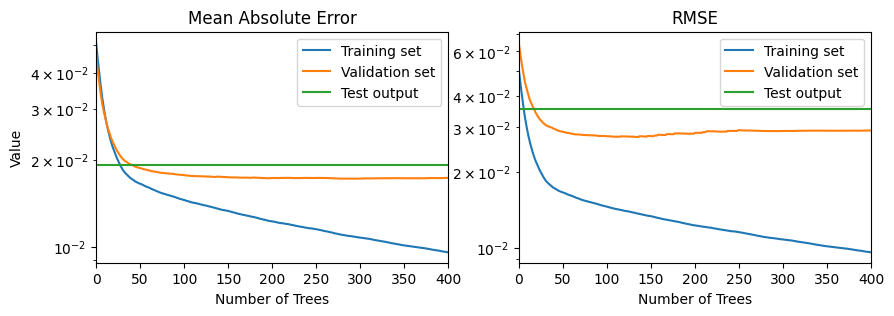

In [45]:
"Plot Metrics"

fig, ax = plt.subplots(1,2,figsize=(10, 3))
ax[0].semilogy(results['train_mae'])  # the training set
ax[0].semilogy(results['valid_mae'])  # the validation set
ax[0].set_title('Mean Absolute Error')
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('Value')
ax[0].set_xlim([0,n_estimators*num_epochs])
ax[1].semilogy(results['train_rmse'])  # the training set
ax[1].semilogy(results['valid_rmse'])  # the validation set
ax[1].set_title('RMSE')
ax[1].set_xlabel('Number of Trees')
ax[1].legend(['Training set','Validation set'])
ax[1].set_xlim([0,n_estimators*num_epochs])

ax[0].semilogy(np.ones((n_estimators*num_epochs,1))*mae_test)
ax[1].semilogy(np.ones((n_estimators*num_epochs,1))*rmse_test)
ax[0].legend(['Training set','Validation set','Test output'])
ax[1].legend(['Training set','Validation set','Test output'])
plt.show()

## **4.6 Logistic Regression**

Given data $\sm{\sa{\bx^i,y^i}}_{i=1}^n$, we want to find an estimate $\hat p\sa{\bx}\in\sr{0,1}$ such that $\mathbb{P}\sa{y^i\mid\bx^i}\approx\hat p\sa{\bx^i}$. For example, suppose that $x^i$ are the hours spent studying to an exam, and $y^i$ is pass/fail ($0,1$). Using this trainig set, we want to estimate the probabilty of passing given the hours studying.

One way to achieve this is to model $\hat p\sa{\bx}=\frac{\exp\sa{\ba^T\bx+b}}{1+\exp\sa{\ba^T\bx+b}}$, where $\frac{e^s}{1+e^s}\in\sr{0,1}$, $s\in\real$ is the *sigmoid* function. Notice that using the *logit* function $\text{logit}\sa{t}=\log\frac{t}{1-t}\in\real$, $t\in\sa{0,1}$, we get $\text{logit}\sa{\hat p\sa{\bx}}=\ba^T\bx+b$. The constants $\ba$ and $b$ are found using maximum-likelihood.

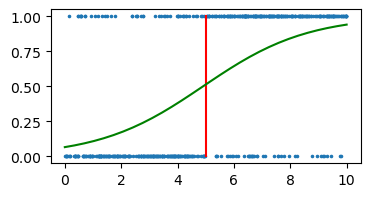

In [ ]:
# In the folloiwng code:
# If x is smaller than i/2, return 0 with probability v and 1 with probability 1-v. If x is greater than i/2, than otherwise.
# For large v, this means that there is a great overlap between y=0 and x<i (but they do not coincide!)
# Therefore, x<(i/2) is a good estimate for y=0.
# We use logistic regression to estimate P(y|x)

def gen_y(x, v, i):
    return [np.random.choice([0, 1], p=[v, 1-v]) if j<(i/2) else np.random.choice([0, 1], p=[1-v, v]) for j in x]

i, v = 10, 0.8
xi = np.sort(np.random.rand(500)*i)
yi = gen_y(xi, v, i)
plt.figure(figsize=(4, 2))
plt.scatter(xi,yi,10,marker='.')  # marker size of 10
plt.plot([i/2,i/2],[0,1], color='red')  # the red line indicates the scalar i

# now we use logistic regression to find a fit
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xi.reshape(-1,1), np.array(yi))  # yi is a python list and we change it to np array

# plot the logistic regression
xx = np.linspace(0,i,30)
ss = xx*lr.coef_.flat+lr.intercept_.flat
plt.plot(xx, np.exp(ss)/(1+np.exp(ss)), color='green')  # the green line is the logistic fit
plt.show()

**Maximum Likelihood Estimation for Logistic Regression.** Given dataset $\sm{\sa{\bx^i,y^i}}_{i=1^n}$ for $y^i\in\sm{0,1}$, we want to find $p$ that solves the system of equations $p\sa{\bx^i}\approx y^i$. In particular, if $y^i=0$ we want $p\sa{\bx^i}$ to be smaller, and vice versa. Writing the likelihood function of the data using the density of the Bernoulli distribution (recall that we calssify $0,1$), we get that $L\sa{p}=\prod_{i=1}^np\sa{\bx^i}^{y^i}\sa{1-p\sa{\bx^i}}^{1-y^i}$, and the log of this function is
$$E\sa{p}=-\sum_{i=1}^n\sa{y_i\log\sa{p\sa{\bx^i}}+\sa{1-y^i}\log\sa{1-p\sa{\bx^i}}},$$
which is the *cross-entrpy* function.

Restricting the discussion to sigmoid $p\sa{\bx}=\frac{\exp\sa{\ba^T\bx+b}}{1+\exp\sa{\ba^T\bx+b}}$ and maximizing $E$ with respect to $\ba,b$ (for example, using gradient descent), gives the optimal $\ba,b$ for this particular model of $p$, and we get the so-called logistic regression fit.

**Multi-class Logistic Regression Using Softmax.** Above we only considered the case for which $y^i\in\sm{0,1}$. What if we have $M$ classes? A close inspection on the previous example reveals that the likelihood function was of the form
$$L\sa{p}=\prod_{i=1}^np_1\sa{\bx^i}^{y_i}\cdot p_2\sa{\bx^i}^{y_i}\cdot\ldots\cdot p_M\sa{\bx^i}^{y_i},$$
where $\sum_{j=1}^Mp_j\sa{\bx^i}=1$, and hence the cross-entropy is $$E\sa{p}=-\sum_{j=1}^M\sum_{i=1}^ny^i\log\sa{p_j\sa{\bx^i}}.$$

How can we model the probabilities $p_j$ of a data point belonging to class $j$? We can use the *softmax* function $p_j\sa{\bx}=\frac{\exp\sa{\bx^T\ba^j+b^j}}{\sum_{j=1}^M\exp\sa{\bx^T\ba^j+b^j}}$ (the summation over $j$ sums to $1$). Maximizing $E$ over all $\ba,b$ gives the multi-class logistic regression.

## **4.8 Regularization**

In [ ]:
# we solve the problem min{||x||^2 : x1+2x2=1} using sympy and finding KKT
S.var('x:2 l',real=True)
func = S.Matrix([x0,x1]).norm()**2 + l*(1-x0-2*x1)
S.solve([S.diff(func, x0), S.diff(func, x1), S.diff(func, l)])

# we solve the problem min{||x||_1 : x1+2x2=1} using cvxpy
x = cvx.Variable(2)
obj = cvx.Minimize(cvx.norm(x, 1))
const = [x[0]+2*x[1]==1]
prob = cvx.Problem(obj, const)
print(prob.solve(solver='ECOS'))
print(x.value)

0.5000000003101714
[6.2034426e-10 5.0000000e-01]


### **4.8.1 Ridge Regression**

In [ ]:
# we solve the problem min||Ax-b||^2 using sympy
A = np.random.rand(20,10)
b = np.random.rand(20,1)
x = [S.Symbol('x'+str(i),real=True) for i in range(1,11)]  # vector variable of size 10: x1,...,x20
func = S.Matrix(A@np.c_[x]-b).norm()**2

# time-consuming way
grad = [S.diff(func, i) for i in x]
print(S.solve(grad))

# slightly faster
grad = 2*A.T@(A@np.c_[x]-b)
print(S.solve(grad.flatten()))

# Both are slow, and we should use the normal equations or cvxpy

{x1: 0.173056151352292, x10: 0.450276520193512, x2: -0.354768939753668, x3: -0.453152550540678, x4: 0.106724780202446, x5: 0.488896788248200, x6: -0.107615199054680, x7: -0.135804468526527, x8: -0.107881400276707, x9: 0.786921391574451}
{x1: 0.173056151352292, x10: 0.450276520193507, x2: -0.354768939753660, x3: -0.453152550540672, x4: 0.106724780202445, x5: 0.488896788248198, x6: -0.107615199054681, x7: -0.135804468526527, x8: -0.107881400276707, x9: 0.786921391574449}


We can use sklearn to solve the following ridge regression problem $\min_{x\in\real^n}\norm{\baa\bx-\bb}^2+\alpha\norm{\bx}^2$.

In [ ]:
clf = skl.linear_model.Ridge(alpha=1, fit_intercept=False)  # see remark below why here set 'fit_intercept=False'
clf.fit(A,b)
print(clf.coef_)
print(np.linalg.norm(A@clf.coef_.reshape((-1,1))-b)**2)  # print MSE

# Why don't we need the intercept term here? Since the data was generated as Ax~b, and NOT Ax+c~b.
# Notice that if we have a set of equations of the form c^Tx+d~y (which is not how we have generated the data),
# and we want to find the coefficients (c,d), then we would write it in matrix form as ||Xc+ones(d)-y||^2,
# and we minimize over (c,d). Hence, d is the intercept in this case

[[ 0.17511863  0.00589244 -0.0581583   0.00447667  0.24369799  0.01191806
  -0.09579533 -0.01813709  0.45747867  0.21420572]]
0.6913551728774681


### **4.8.2 Lasso Regression**

Here we solve the problem $\min_{x\in\real^n}\norm{\baa\bx-\bb}^2+\alpha\norm{\bx}_1$. Here we cannot obtain a closed-form solution as in Ridge, so sklearn provokes Alternating Minimization to minimize it sequentially. Hence we depend on the number of iteration, which is $1000$ by default.

In the code below we compare between Ridge and Lasso (with $1000000$ iterations). Notice the warning for alpha=0 in Lasso (this is equivalent to normal equations and hence sklearn prefers Ridge instead of Alternating Minimization).

C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.665e+00, tolerance: 7.024e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn

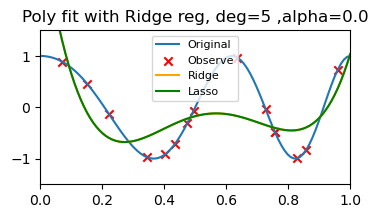

Norm of ridge coef vecor: 249.03574256624634
Norm of lasso coef vecor: 249.0357421603541


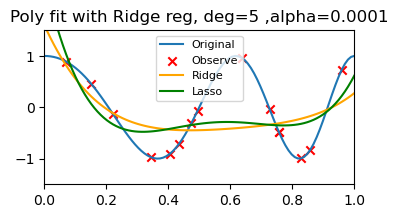

Norm of ridge coef vecor: 49.9934119942226
Norm of lasso coef vecor: 139.37962710361282


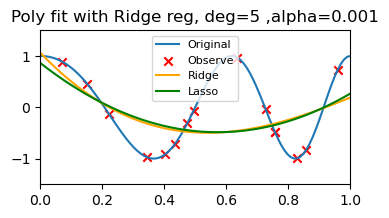

Norm of ridge coef vecor: 9.853636370102631
Norm of lasso coef vecor: 6.3165013168521025


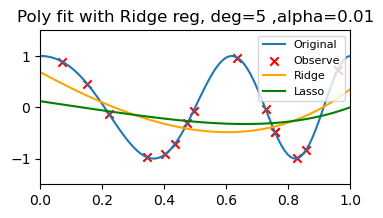

Norm of ridge coef vecor: 3.823550255498419
Norm of lasso coef vecor: 1.193662956353389


In [ ]:
np.random.seed(2)

m = 15  # number of obseravations of the signal
N = 5  # N-1 is the degree of polynomial approximation
alpha_array = np.sort(np.concatenate(([0], [10**(-i) for i in range(2,5)])))  # regularizer for ridge/lasso regression

x = np.linspace(0,1,100)
xi = np.sort(np.random.choice(x,m))  # random 20 sorted numbers on the line [0,1]
b = np.cos(2*np.pi*(xi+xi**2))
b_real = np.cos(2*np.pi*(x+x**2))

# create Vandermonde matrix for poly fit using ridge/lasso regression
uu = np.repeat(xi.reshape(-1,1),N,1)
for i in range(N):
    uu[:,i]=uu[:,i]**i

# apply ridge/lasso regression
for alp in alpha_array:  # for alpha=0 this is merely least squares and equivalent to: coef = (np.linalg.inv(uu.T@uu))@(uu.T@b)
    plt.figure(figsize=(4,2))
    plt.plot(x, b_real)  # real signal
    plt.scatter(xi, b, marker='x', color='red')  # observed signal

    clf = skl.linear_model.Ridge(alpha=alp, fit_intercept=False)  # set intercept=0 as the data is centered (we accounted for the free coef by introducing column of 1s in matrix uu)
    llf = skl.linear_model.Lasso(alpha=alp, fit_intercept=False, max_iter=1000000)
    clf.fit(uu,b.reshape(-1,1))
    llf.fit(uu,b.reshape(-1,1))

    g = lambda x: sum(clf.coef_.flatten()[i]*x**i for i in range(N))  # g is the fitted poly for ridge
    h = lambda x: sum(llf.coef_.flatten()[i]*x**i for i in range(N))  # h is the fitted poly for lasso

    plt.plot(x, g(x), 'orange')
    plt.plot(x, h(x), 'green')
    plt.xlim([0,1]), plt.ylim([-1.5,1.5])
    plt.title('Poly fit with Ridge reg, deg='+str(N)+' ,alpha='+str(alp))
    plt.legend(['Original','Observe','Ridge','Lasso'], fontsize=8)
    plt.show()
    print('Norm of ridge coef vecor:', np.linalg.norm(clf.coef_.flatten()))
    print('Norm of lasso coef vecor:', np.linalg.norm(llf.coef_.flatten()))

# clearly when alpha=0 the data is overfit (we can increase alpha or decrease the poly deg)

## **4.9 Support Vector Machines**

Assume linearly separable classes. We want to find a separtor $\beta_0+\bbeta^T\bx=0$ with the widest margins. As a consequence, we uncover the elements in the data that touch the margins. These are the *support* elements. The other elements are not relevant to the solution. This reduces model variance because the solution is insensitive to the removal of elements other
than the supports (usually a small minority).

For a dateset $\sm{\sa{\bx^i,y^i}}_{i=1}^N$, $y^i\in\sm{-1,1}$, we can find this separtor by solving the folloiwng quadratic problem:
\begin{split}
\max_{\beta_0,\norm{\bbeta}=1,M}\quad&M\\
\text{s.t.}\quad&y^i\sa{\beta_0+\bbeta^T\bx^i}\ge M,\quad\forall i=1,2,\ldots,N.
\end{split}
With some manipulations, this is equivalent to
\begin{split}
\min_{\beta_0,\bbeta}\quad&\norm{\bbeta}\\
\text{s.t.}\quad&y^i\sa{\beta_0+\bbeta^T\bx^i}\ge 1,\quad\forall i=1,2,\ldots,N.
\end{split}
This problem can be solved using convex optimization.

What if the classes are not separable? In this case we need to allow some margin, and we solve the problem
\begin{split}
\min_{\beta_0,\bbeta,\boldsymbol{\xi}}\quad&\norm{\bbeta}\\
\text{s.t.}\quad&y^i\sa{\beta_0+\bbeta^T\bx^i}\ge 1-\boldsymbol{\xi}_i,\quad\forall i=1,2,\ldots,N,\\
&0\le\boldsymbol{\xi},\quad\sum_{i=1}^N\boldsymbol{\xi}_i\le C.
\end{split}

For C=9.3:  optimal
For C=9.8:  optimal
For C=10:  optimal


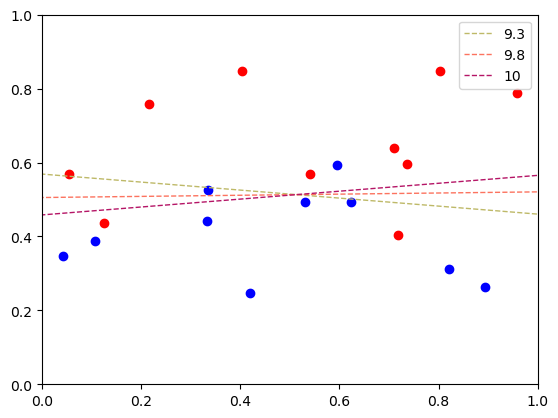

In [ ]:
np.random.seed(6)
N = 20  # size of dataset
n = int(N/2)
C_array = [9.3,9.8,10]  # hyper-parameter for prediction on the wrong side
# for this particular seed the problem is infeasible for less than C=9.3 (we cannot know this in advance)

# generate the dataset
X1 = np.concatenate((np.random.rand(n,1), np.random.rand(n,1)*0.6),1)
X2 = np.concatenate((np.random.rand(n,1), 1-np.random.rand(n,1)*0.6),1)
X = np.concatenate((X1, X2),0)
y = np.concatenate((np.ones((n)), -np.ones((n))))
colors = np.random.rand(len(C_array),3)  # set colors with RGB

for C in C_array:
    beta0 = cvx.Variable()
    beta = cvx.Variable(2)
    xi = cvx.Variable(N)

    constraints = [y[i]*(beta0 +beta@X[i,:].reshape(-1,1)) >= 1 - xi[i] for i in range(N)]
    constraints += [xi >= 0, cvx.sum(xi) <= C]

    obj = cvx.Minimize(cvx.norm(beta))
    problem = cvx.Problem(obj, constraints)
    problem.solve(solver='ECOS')
    print('For C='+str(C)+': ', problem.status)

    # here we plot the separator (notice that it is defined only by the perpendicular to beta and not beta0, and we need to center this perp vector so add the mean)
    sep1 = [beta.value[1], 0, -beta.value[1]] + np.mean(X)  # the perp vector passing through the origin to each direction
    sep2 = [-beta.value[0], 0, beta.value[0]] + np.mean(X)
    plt.plot(sep1, sep2,'--',color=colors[C_array.index(C),:],linewidth=1)

# scatter the two almost separable sets
plt.scatter(X1[:,0], X1[:,1], color='blue')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.legend(list(map(str, C_array)))
plt.xlim([0,1]), plt.ylim([0,1])
plt.show()

## **4.10 Dimensionality Reduction**
We can use sklearn to perform PCA.


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
x = np.linspace(-1,1,30)
X = np.c_[x,x+1,x+2]  # the columns are the different features
pca.fit(X)

PCA()

### **4.10.1 Independent Component Analysis**

Here we want to reconstruct $M$ signals $\bs^1,\bs^2,\ldots,\bs^M\in\real^n$ (aka sources) given $N$ observed signals $\bx\in\real^n$. For example, $M$ people are talking simultaneously, forming $N$ observed signals (could be just $1$ signal that is the addition of all source signals). Mamthematically, if $\bx^j$, $j=1,2,\ldots,N$, is an observed signal, then its coordinates are modeled as
$$\bx_i^j=\ba_{j1}\bs^1_i+\ldots+\ba_{jM}\bs^M_i,\quad\forall i=1,2,\ldots,m.$$
In matrix form this can be written as $\bxx=\bss\baa^T$, where $\bxx$ and $\bss$ contain the corresponding vectors as coulmns, and $\baa$ is $N\times M$.

We aim at reconstructing $\bss$, while $\baa$ is also unknown. ICA finds the independent components (also called factors, latent variables or sources) by maximizing the statistical independence of the estimated components. We may choose one of many ways to define a proxy for independence, and this choice governs the form of the ICA algorithm. There is no need to reconstruct $\baa$, as the matrix $\bxx$ is used to reconstruct $\bss$ by maximizing the independence of the columns of $\bxx$.

Both PCA and ICA try to find a set of vectors, a basis, for the data. So we can write any point (vector) in the data as a linear combination of the basis.

In PCA the basis is the one that best explains the variability of the data. In ICA the basis is the one in which each vector is an independent component of the data (most unrelated/uncorrelated vectors), you can think of your data as a mix of signals and then the ICA basis will have a vector for each independent signal. Fo example, after mixing a black and white images, then applying ICA will reconstruct the original images, while PCA would return an image with blacker (mixed) pixels and the other with the whiter (mixed) pixels.

In a more practical way we can say that PCA helps us when we want to find a reduced-rank representation of the data and ICA helps when we want to find a representation of the data as independent sub-elements.

The three original signals S (top), and the four mixed signals X (bottom)


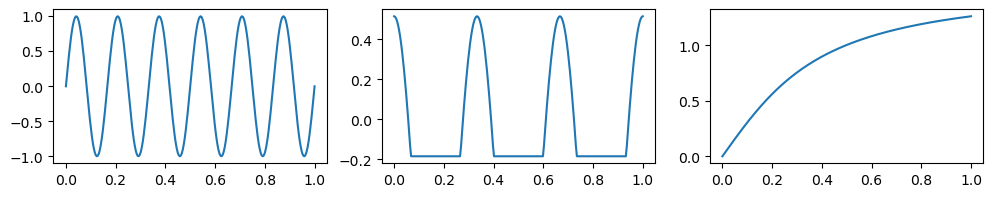

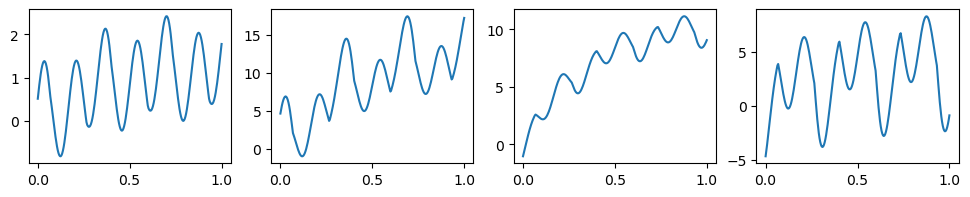

In [ ]:
# generate the original signals S, mixture matrix A, and observed signals X
t = np.linspace(0,1,250)
s1 = np.sin(2*np.pi*t*6)
s2 =np.maximum(np.cos(2*np.pi*t*3),0.3)
s2 = s2 - s2.mean()
s3 = np.arctan(np.pi*t)
#s1 = s1/np.linalg.norm(s1)
#s2 = s2/np.linalg.norm(s2)
#s3 = s3/np.linalg.norm(s3)
S = np.c_[s1, s2, s3]
A = np.array([[ 1, 1,1],
              [3, 9,10],
              [1, -2,8],
              [3, -9,3]])
X = S@A.T

_, axarrS = plt.subplots(1,3, figsize=(12, 2))
_, axarrX = plt.subplots(1,4, figsize=(12, 2))
print('The three original signals S (top), and the four mixed signals X (bottom)')
axarrS[0].plot(t, s1), axarrS[1].plot(t, s2), axarrS[2].plot(t, s3)
axarrX[0].plot(t, X[:,0]), axarrX[1].plot(t, X[:,1]), axarrX[2].plot(t, X[:,2]), axarrX[3].plot(t, X[:,3])
plt.show()

The three oreconstructed unmixed signals (blue) together with the original signals (dashed)


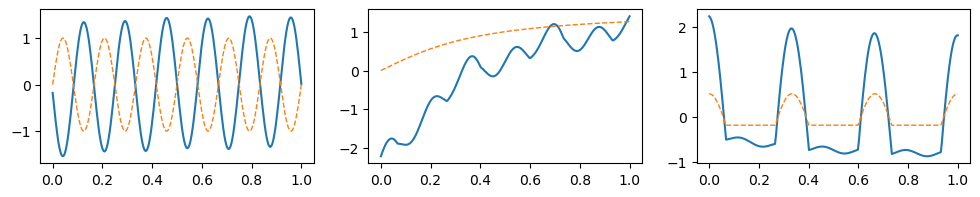

In [ ]:
from sklearn.decomposition import FastICA, PCA
np.random.seed(4)
ica = FastICA(n_components=3)  # return 3 recovered signals (default is as X)
estS = ica.fit_transform(X)

print('The three reconstructed unmixed signals (blue) together with the original signals (dashed)')
_, axarrSest = plt.subplots(1,3, figsize=(12, 2))
axarrSest[0].plot(t, estS[:,0]), axarrSest[0].plot(t, s1, '--',linewidth=1)
axarrSest[1].plot(t, estS[:,1]), axarrSest[1].plot(t, s3, '--',linewidth=1)
axarrSest[2].plot(t, estS[:,2]), axarrSest[2].plot(t, s2, '--',linewidth=1)
plt.show()
# we can see that in this case it did a pretty nice job

## **4.11 Clustering**

A family member of the unsupervised ML algorithms. In $K$-means clustering we aim at finding $K$ centers (of clusters) given data set $\bxx$. We minimize
$$\text{argmin}_{\bss}\sum_{k=1}^K\sum_{\bx\in S_k}\norm{\bx-\bmu^k}^2,$$
where $\bmu^k$ is the centroid of cluster $S_k$, that is $\bmu^k=\frac{1}{\abs{S_k}}\sum_{\bx\in S_k}\bx$.
The *distortion* of cluster $S_k$ is defined as the summand $\sum_{\bx\in S_k}\norm{\bx-\bmu^k}^2$. A more relaxed formulation is
$$\text{argmin}_{\bmu\in\real^{n\times K}}\sum_{k=1}^K\sum_{i=1}^N\norm{\bx^i-\bmu^k}^2.$$

The most common algorithm uses an iterative refinement technique. Givem a set of initial $k$-means (centroids), the algorithm proceeds by alternating between two steps (there exist smart initialization algorithms):
1. Assignment step: Assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance.
2. Update step: Recalculate means (centroids) for observations assigned to each cluster.

The algorithm has converged when the assignments no longer change. The algorithm is not guaranteed to find the optimum.

C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyal.gur.STAFF\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


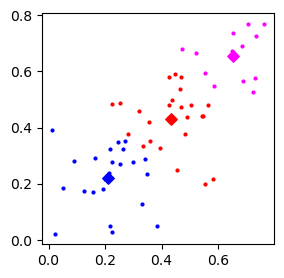

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X1 = np.random.rand(20,2)*0.4
X2 = 0.2 + np.random.rand(20,2)*0.4
X3 = 0.4 + np.random.rand(20,2)*0.4
X = np.concatenate((X1, X2, X3))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
dist = cdist(X, kmeans.cluster_centers_,'euclidean')  # the distances to each of the k-means

# plotting the clusters with cluster heads
plt.figure(figsize=(3,3))
ind_mean = np.argmin(dist, 1) # find the index (0,1,2) of the nearest mean
plt.scatter(X[np.where(ind_mean == 0),0], X[np.where(ind_mean == 0),1],color='blue',s=4)
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1],color='blue',s=34,marker='D')
plt.scatter(X[np.where(ind_mean == 1),0], X[np.where(ind_mean == 1),1],color='red',s=4)
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1],color='red',s=34,marker='D')
plt.scatter(X[np.where(ind_mean == 2),0], X[np.where(ind_mean == 2),1],color='magenta',s=4)
plt.scatter(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1],color='magenta',s=34,marker='D')
plt.show()

## **4.11 Ensemble Methods**

With the exception of the random forest, we have so far considered machine learning models as stand-alone entities. Combinations of models that jointly produce a classification are known as ensembles. There are two main methodologies that create
ensembles: bagging and boosting.

### 4.12.1 Bagging
Basically, we resample the data with replacement and then train a classifier on the newly sampled data. Then, we combine the outputs of each of the individual classifiers. This technique is particularly effective for models that are easily influenced by a single data element. The resampling process means that these elements cannot appear in every bootstrapped training set so that some of the models will not suffer these effects. Thus, bagging helps reduce the collective variance of individual
high-variance models. For instance, we can use majority voting of the classifiers to produce a single classification (or any other method).

### 4.12.2 Boosting
Boosting is particularly effective for high-bias classifiers that are slow to adjust to new data. On the one hand, boosting is similar to bagging in that it uses a majority-voting (or averaging for numeric prediction) process at the end, and it also combines individual classifiers of the same type. On the other hand, boosting is serially iterative, whereas the individual
classifiers in bagging can be trained in parallel.

Looking at the boosting section above, we see that at every step, boosting focuses more and more on specific misclassifications up to that point, letting the prior classifications be carried by earlier iterations. AdaBoost is the primary implementation of boosting in sklearn.

## **4.13 Deep Learning**

**Perceptron Learning.** The perceptron creates a linear classifier that can separate points in $\real^n$ between two classes. This is simply linear regression as in SVM. I.e., we find $\bw\in\real^n$ such that $\bw^T\bx^i>0$ if $y^i>0$ and $\bw^T\bx^i<0$ otherwise. In matrix form is $\bxx^T\bw\approx\by$ and we can use least squares. We can also use gradient descent and the updates are $\bw^{k+1}=\sa{\bii_n-t^k\bxx\bxx^T}\bw^k-t^k\bxx\by$.

In parctice, to reduce computational burden, we work with *mini-batches* of the data, which results in the following variant of gradient descent:
1. Initialize $\bw^0$ and split the data to mini-batches.
2. For each mini-batch $\sa{\bxx_B,\by_B}\subset\sa{\bxx,\by}$:
    1. $\bw^{k+1}=\sa{\bii_n-t^k\bxx_B\bxx^T_B}\bw^k-t^k\bxx_B\by_B$.

After the process is done, we can shuffle all data and repeat is again with the output $\bw$ as the initial one (possibly with different mini-batches). One forward feed of all data through the process is called an *epoch*. We can also use SGD (where only part of the weights are updated in each iteration) instead of GD. There sre some convegnce theorems.

How do we make predictions once we have $\bw$? We simply calculate $\text{sign}\sa{\bw^T\bx}$. This is way the $\text{sign}$ function is called the *activation* function of the perceptron $\bw$.

Recall that we try to approximate $\bxx^T\bw\approx\by$. Since we are interested only in the signs, we can consider in advance the approximation using the activation function $\text{sign}\sa{\bxx^T\bw}\approx\by$. This approximation is more relaxed, and it gives more options for the values of the weights, hence better training. However, it is non-differentiable and it renders the algorithm more complicated. We can still use non-differentiable activations, or we can use differentiable activations that are close to the sign function (such as softsign $x/\sa{\epsilon+\abs{x}}$ which pushes the values to $1$ and $-1$), with still better options for the update of $\bw$ and by that better training. This also allows non-linear classification.

**Multilayer Perceptron.** A generalization that uses several perceptrons working together. This allows for classification into several classes (as we have several perceptrons in the last layer), and it also allows for more complex non-linear classification.

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_349 (Dense)           (None, 4)                 12        
                                                                 
 dense_350 (Dense)           (None, 2)                 10        
                                                                 
 dense_351 (Dense)           (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.6651 - accuracy: 0.6943
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.8371
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3777 - 

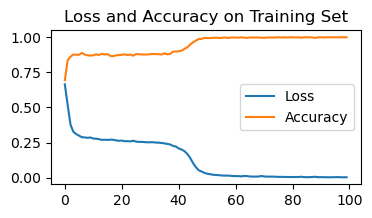

10/10 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Loss on test set:  0.00327776069752872 | Accuracy on test set:  1.0
7813/7813 [==============================] - 7s 952us/step


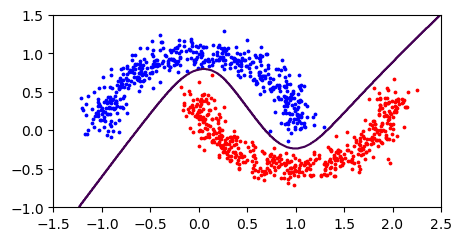

In [ ]:
np.random.seed(3)
from sklearn.datasets import make_moons  # import dataset
X, y = make_moons(n_samples=1000, noise=0.1)

# implement NN for binary classification
model = tf.keras.models.Sequential()  # create a sequential NN
model.add(tf.keras.layers.Dense(4,input_shape=(2,),activation='sigmoid'))  # first layer with 2-input and 4-output with sigmoid
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # last layer with one output (binary classification)
model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),metrics=['accuracy'])  # this also tracks the accuracy
model.summary()

# split the data into train and test
X_train,X_test,y_train,y_test = skl.model_selection.train_test_split(X, y, test_size=0.3)

# training the MLP (NN)
h = model.fit(X_train, y_train, epochs=100, verbose=1)
plt.figure(figsize=(4,2))
plt.plot(h.history['loss'])
plt.plot(h.history['accuracy'])
plt.legend(['Loss','Accuracy'])
plt.title('Loss and Accuracy on Training Set')
plt.show()

loss_test,acc_test=model.evaluate(X_test,y_test,verbose=1)
print('Loss on test set: ', loss_test, '| Accuracy on test set: ', acc_test)

# plot the (noisy) dataset
plt.figure(figsize=(5,2.5))
plt.scatter(X[np.where(y==0),0], X[np.where(y==0),1], color='blue',s=3)
plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1], color='red',s=3)

# plot the non-linear separator
grid_N = 500  # size of meshgrid for plotting
xx = np.linspace(-1.5, 2.5 , grid_N)  # x-values size N by 1
yy = np.linspace(-1, 1.5, grid_N)  # y-values size N by 1
xx, yy = np.meshgrid(xx,yy)  # coordinates of plane each size N by N
grid_to_eval = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)),1)  # grid for prediction by the trained model (2N by 2)
zz = model.predict(grid_to_eval)  # predicted values size 2N by
plt.contour(xx, yy, (zz.reshape(grid_N,grid_N)>0.5))  # contour of probability (values) more than 0.5 size N by N
plt.show()
# NOTICE: the contour plots is on top of the training set AND test set (they are not distinguishable in the plot)

### **4.13.2 Understanding Gradient Descent**

We minimize logistic regression using variants of gradient descent. Folloiwng the derivations above, the loss function (called cross-entropy), can be written as follows (where $p\sa{\bx}=\frac{\exp\sa{\ba^T\bx+b}}{1+\exp\sa{\ba^T\bx+b}}$):
$$J\sa{\ba,b}=-\sum_{i=1}^N\sr{\sa{y_i-1}\log\sa{1+\exp\sa{\ba^T\bx_i+b}}-y_i\sa{\ba^T\bx_i+b}}.$$
By extending the data points $\bx_i$ with $1$-s and treating $\ba$ as inclusing the bias in its last coordinate, we get that the gradient of $J$ w.r.t its variable $\ba$ is
$$\nabla J\sa{\ba}=\sum_{i=1}^N\frac{\bx_i}{1+\exp\sa{-\ba^T\bx_i}}-y_i\bx_i.$$

In [62]:
from sympy.tensor.array import derive_by_array  # for gradient

# create random data for logistic regression
N = 100
X = np.concatenate((np.random.rand(N,2)*6-3, np.ones((N,1))),1)  # N random between in [-3,3]
labels = np.ones((N,1))
labels[(X[:,1]<X[:,0])]=0  # 0,1 labels


# defining the objective
x0, x1, x2 = S.symbols('x:3',real=True)
a0, a1, a2 = S.symbols('a:3',real=True)  # the third one is actually the bias
y = S.symbols('y',real=True)
summand = (y-1)*S.log(1+S.exp(x0*a0+x1*a1+x2*a2))-y*(x0*a0+x1*a1+x2*a2)
J = sum([summand.subs({x0:i[0], x1:i[1], x2:i[2], y:j[0]}) for i,j in zip(X,labels)])
grad = derive_by_array(summand,(a0,a1,a2))  # gradient of one summand

KeyboardInterrupt: 

In [ ]:
max_iter = 20
w = np.random.randn(3)*20  # starting point
alpha = 0.1

# standard gradient descent
grads = np.array([grad.subs({x0:i[0], x1:i[1], x2:i[2], y:j[0]}) for i,j in zip(X,labels)]).sum(axis=0)
gradsf_0 = S.lambdify((a0,a1,a2),grads[0])
gradsf_1 = S.lambdify((a0,a1,a2),grads[1])
gradsf_2 = S.lambdify((a0,a1,a2),grads[2])
Jf = S.lambdify((a0,a1,a2),J)  # turn J to a function in terms of variables
J_val = []
for i in range(max_iter):
    w = w - alpha*np.array([gradsf_0(w[0], w[1], w[2]), gradsf_1(w[0], w[1], w[2]), gradsf_2(w[0], w[1], w[2])])
    J_val.append(Jf(w[0], w[1], w[2]))

# SGD does the same, but randonly selects one data point in each iteration for calculatung grads (in GS grads is the sum of ALL)
# Batch SGD is the same as SGD but for a mini-batch in each iteration

### **4.13.3 Image Processing Using Convolutional Neural Networks**

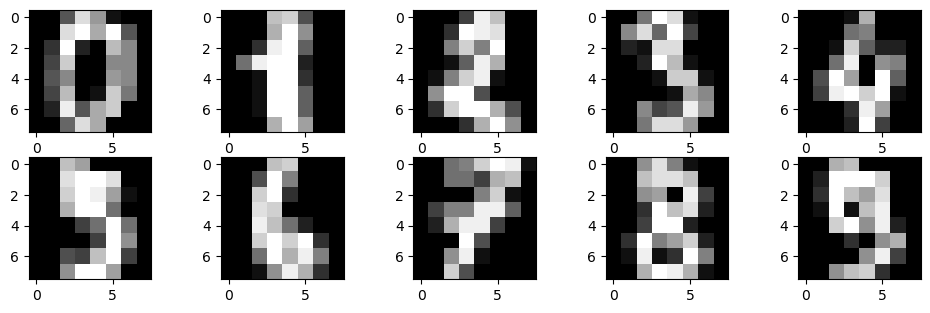

In [ ]:
# load and plot some MNIST images
from sklearn import datasets
mnist = datasets.load_digits()

_, mnist_plot = plt.subplots(2,5, figsize=(12, 3.5))
for i in range(10):
    if i<5:
        mnist_plot[0,i].imshow(mnist['images'][i],cmap='gray')
    else:
        mnist_plot[1,i-5].imshow(mnist['images'][i],cmap='gray')

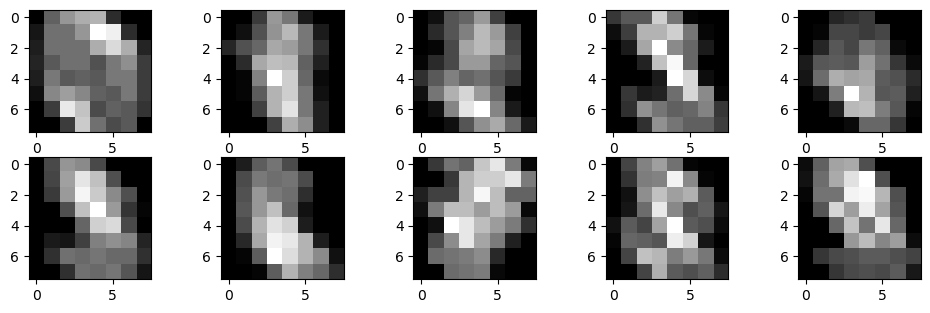

In [ ]:
# here we use the convolution operation to detect digonal elements in the first 10 images of MNIST.
from scipy.ndimage import convolve  # performs the convolution operation (we can use pure numpy or torch/keras instead)
kernel = np.eye(3)  # set a digonal filter

_, conv_plot = plt.subplots(2,5, figsize=(12, 3.5))
for i in range(10):
    res = convolve(mnist['images'][i], kernel, mode='constant', cval=0)  # Perform the convolution. Mode 'constant' means padding with constant values, and cval mean 0 padding
    if i<5:
        conv_plot[0,i].imshow(res,cmap='gray')
    else:
        conv_plot[1,i-5].imshow(res,cmap='gray')

In [ ]:
## we use keras to build a CNN
N = 10 # classes in MNIST

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    conv1 = keras.layers.Conv2D(32, (3,3), data_format='channels_last')  # two filters of size 3, valid padding
    relu = keras.layers.Activation('relu')
    maxpool = keras.layers.MaxPool2D((2,2))  # (2,2) max pool with stride 1 so the output is (4,4)
    conv2 = keras.layers.Conv2D(64, (3,3), data_format='channels_last')  # two filters of size 2 valid padding

    x = conv1(inputs)
    x = relu(x)
    x = maxpool(x)
    x = conv2(x)
    x = relu(x)
    #x = maxpool(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs, outputs)

model = make_model(input_shape=(28,28,1), num_classes=N)  # construct the model
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255
model.fit(x_train, keras.utils.to_categorical(y_train, N), epochs=5, batch_size=128, validation_split=0.1)

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_84 (Conv2D)          (None, 26, 26, 32)           320       ['input_43[0][0]']            
                                                                                                  
 activation_42 (Activation)  multiple                     0         ['conv2d_84[0][0]',           
                                                                     'conv2d_85[0][0]']           
                                                                                                  
 max_pooling2d_42 (MaxPooli  (None, 13, 13, 32)           0         ['activation_42[0][0]']

In [ ]:
# evaluation of the CNN
score = model.evaluate(x_test, keras.utils.to_categorical(y_test, N), verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9876
Test loss: 0.03897988423705101
Test accuracy: 0.9876000285148621
